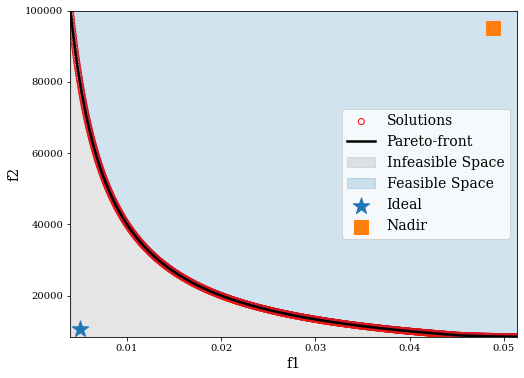

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.use("pgf")
# plt.rcParams['pgf.texsystem'] = 'pdflatex'
# plt.rcParams['text.usetex'] = True
# plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['figure.edgecolor'] = 'k'
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.family'] = "serif"
import seaborn as sb
import pandas as pd

from pymoo.problems import get_problem
from pymoo.util.plotting import plot
from pymoo.visualization.scatter import Scatter

F = get_problem("truss2d").pareto_front()
a = min(F[:,0])
b = max(F[:,0])
f1 = F[:,0]
f2 = F[:,1]
shift = 0.75

fig, ax = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')
ax.scatter(F[:,0], F[:,1], label="Solutions", facecolor='none', edgecolor='r')
ax.plot(F[:,0], F[:,1], label="Pareto-front", color='k', lw=2.5)
ax.set_xlabel('f1', fontsize=14)
ax.set_ylabel('f2', fontsize=14)
ax.fill_between(f1, f2, alpha=0.2, label='Infeasible Space', color='gray')
ax.fill_between(f1, f2, max(F[:,1]), alpha=0.2, label='Feasible Space', color='tab:blue')

ax.set_xlim(a,b)
ax.set_ylim(min(F[:,1]),max(F[:,1]))
ax.scatter((2-shift)*min(F[:,0]),(2-shift)*min(F[:,1]), label='Ideal', marker="*", s=300, color='tab:blue')
ax.scatter(0.95*max(F[:,0]),0.95*max(F[:,1]), label='Nadir', marker="s", s=200, color='tab:orange')
ax.legend(fontsize=14)
# plt.savefig("../docs/figures/truss2d_pareto.pgf")
plt.show()


C:\Users\samgd\AppData\Local\Temp\ipykernel_26964\2606005473.py:26: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


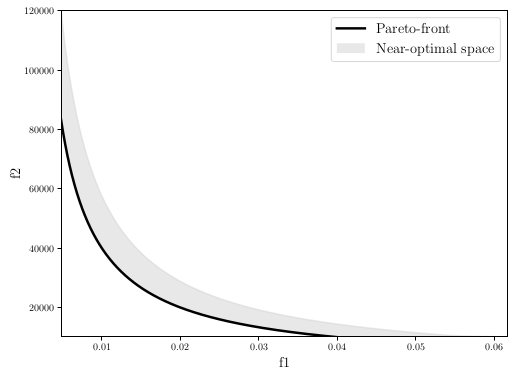

In [52]:
mpl.use("pgf")
plt.rcParams['pgf.texsystem'] = 'pdflatex'
plt.rcParams['text.usetex'] = True
plt.rcParams['pgf.rcfonts'] = False
slack = 0.2
alpha = 0.5
F1 = f1 * (1+slack)
F2 = f2 * (1+slack)
fig, ax = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')
# ax.scatter(F1, F2, label="Solutions", facecolor='none', edgecolor='r')
subopt = ax.plot(F1, F2, label="", color='lightgray',alpha=alpha)
opt=ax.plot(f1, f2, label="Pareto-front", color='k', lw=2.5)
ax.set_xlabel('f1', fontsize=14)
ax.set_ylabel('f2', fontsize=14)
# ax.fill_between(f1, f1, F2)
plt.fill(np.append(f1, F1[::-1]), np.append(f2, F2[::-1]), 'lightgrey', alpha=alpha, label="Near-optimal space")
# ax.fill_between(f1, f2, alpha=0.2, label='Infeasible Space', color='gray')
# ax.fill_between(F1, F2, max(F2), alpha=0.2, label='Feasible Space', color='tab:blue')

ax.set_xlim(min(F1),max(F1))
ax.set_ylim(min(F2),max(F2))
# ax.scatter((2-shift)*min(F[:,0]),(2-shift)*min(F[:,1]), label='Ideal', marker="*", s=300, color='tab:blue')
# ax.scatter(0.95*max(F[:,0]),0.95*max(F[:,1]), label='Nadir', marker="s", s=200, color='tab:orange')
ax.legend(fontsize=14)
plt.savefig("../docs/figures/near-optimal-pareto.pgf")
plt.show()